Unnamed: 0       0
Melody           0
Timestamp        0
song_num         0
chord            0
chord_encoded    0
dtype: int64


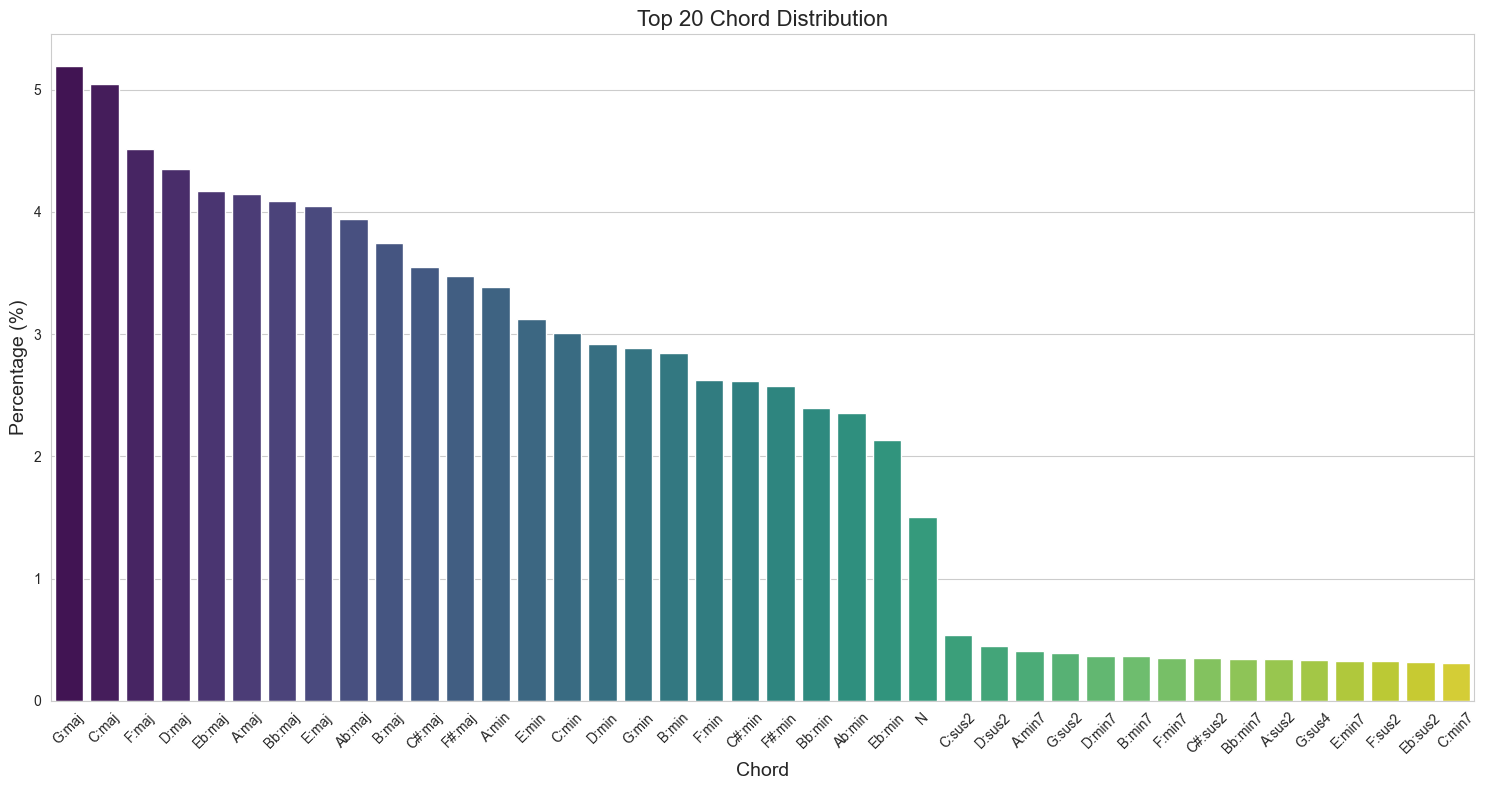

In [205]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import flatten
# 讀取資料
df = pd.read_csv('csv_file/merge_df_dataset.csv')

# 1. Label Encoding
label_encoder = LabelEncoder()
df['chord_encoded'] = label_encoder.fit_transform(df['chord'])

print(df.isna().sum())




# 使用Seaborn風格
sns.set_style("whitegrid")

# 從提供的數據框中計算和弦的出現次數並取前20名
top_20_chords = df['chord'].value_counts().nlargest(40)

# 計算占比
chord_percentage_top_40 = top_20_chords / len(df) * 100

# 繪製條形圖
plt.figure(figsize=(15, 8))  # 設定圖形大小
sns.barplot(x=chord_percentage_top_40.index, y=chord_percentage_top_40.values, palette="viridis")
plt.title('Top 20 Chord Distribution', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xlabel('Chord', fontsize=14)
plt.xticks(rotation=45)  # 旋轉X軸標籤，使其易於閱讀
plt.tight_layout()
plt.show()



In [207]:
import pandas as pd
import ast
#drop columns
df = df.drop(['Unnamed: 0', 'Timestamp'], axis=1)

num_chords = df['chord_encoded'].nunique()
df['Melody'] = df['Melody'].apply(ast.literal_eval)
pitch_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# 拆分 "Melody" 列為12個新列
expanded_melody = pd.DataFrame(df['Melody'].tolist(), columns=pitch_names)

# 將拆分後的列合併到原始的 DataFrame 中，但保留原始的 "Melody" 列
df = pd.concat([df, expanded_melody], axis=1)

df.drop('Melody', axis=1, inplace=True)
df


,song_num,chord,chord_encoded,C,C#,D,D#,E,F,F#,G,G#,A,A#,B
0,1,N,162,0,0,0,0,0,0,0,0,0,0,0,0
1,1,N,162,0,0,0,0,0,0,0,0,0,0,0,0
2,1,B:maj,32,0,0,0,0,0,0,0,0,0,0,0,0
3,1,C#:maj,58,0,0,0,0,0,0,0,0,0,0,0,0
4,1,Bb:min,47,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149403,909,C:maj,71,0,0,1,0,2,0,0,0,0,0,0,0
149404,909,G:maj,154,0,0,1,0,1,2,0,0,0,0,0,0
149405,909,G:maj,154,1,0,0,0,0,0,0,0,0,1,0,2
149406,909,C:maj,71,1,0,0,0,0,0,0,0,0,0,0,0


In [213]:
grouped = df.groupby('song_num')
window_size = 10
for name, group in grouped:
    print(name, group)

1      song_num    chord  chord_encoded  C  C#  D  D#  E  F  F#  G  G#  A  A#  B
0           1        N            162  0   0  0   0  0  0   0  0   0  0   0  0
1           1        N            162  0   0  0   0  0  0   0  0   0  0   0  0
2           1    B:maj             32  0   0  0   0  0  0   0  0   0  0   0  0
3           1   C#:maj             58  0   0  0   0  0  0   0  0   0  0   0  0
4           1   Bb:min             47  0   0  0   0  0  0   0  0   0  0   0  0
..        ...      ...            ... ..  .. ..  .. .. ..  .. ..  .. ..  .. ..
141         1   Eb:min            115  0   0  0   0  0  0   0  0   0  0   0  0
142         1    B:maj             32  0   0  0   0  0  0   0  0   0  0   0  0
143         1  F#:sus2            133  0   0  0   0  0  0   0  0   0  0   0  0
144         1   F#:maj            126  0   0  0   0  0  0   0  0   0  0   0  0
145         1   F#:maj            126  0   0  0   0  0  0   0  0   0  0   0  0

[146 rows x 15 columns]
2      song_num   chord  

In [208]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

time_steps = 120  # 時間步長
pitch_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# 選擇特徵和目標變數
X = []
y = []

for i in range(len(df) - time_steps):
    #print progress
    print(i/ (len(df) - time_steps) * 100, '%')
    X.append(df.iloc[i:i+time_steps][pitch_names].values.tolist())
    y.append(df.iloc[i + time_steps]["chord_encoded"])

X = np.array(X)
y = np.array(y)




0.0 %
0.0006698462033117197 %
0.0013396924066234393 %
0.002009538609935159 %
0.0026793848132468786 %
0.003349231016558598 %
0.004019077219870318 %
0.004688923423182037 %
0.005358769626493757 %
0.006028615829805476 %
0.006698462033117196 %
0.007368308236428915 %
0.008038154439740637 %
0.008708000643052355 %
0.009377846846364075 %
0.010047693049675795 %
0.010717539252987515 %
0.011387385456299234 %
0.012057231659610953 %
0.012727077862922674 %
0.013396924066234392 %
0.014066770269546112 %
0.01473661647285783 %
0.01540646267616955 %
0.016076308879481273 %
0.01674615508279299 %
0.01741600128610471 %
0.01808584748941643 %
0.01875569369272815 %
0.01942553989603987 %
0.02009538609935159 %
0.02076523230266331 %
0.02143507850597503 %
0.02210492470928675 %
0.02277477091259847 %
0.023444617115910185 %
0.024114463319221905 %
0.02478430952253363 %
0.025454155725845348 %
0.026124001929157065 %
0.026793848132468785 %
0.027463694335780504 %
0.028133540539092224 %
0.028803386742403944 %
0.0294732329457

KeyboardInterrupt: 

In [ ]:
# 將資料分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 LSTM 模型
model = Sequential()
model.add(LSTM(128, input_shape=(time_steps, len(pitch_names))))
model.add(Dense(256, activation='relu'))
model.add(Dense(np.max(y)+1, activation='softmax'))  # 使用 np.max(y)+1 確保神經元的數量涵蓋所有可能的和弦編碼
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# 使用 X_test 進行預測，並評估模型的表現
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
 438/1867 [======>.......................] - ETA: 3:37 - loss: 3.1910 - accuracy: 0.1304

KeyboardInterrupt: 

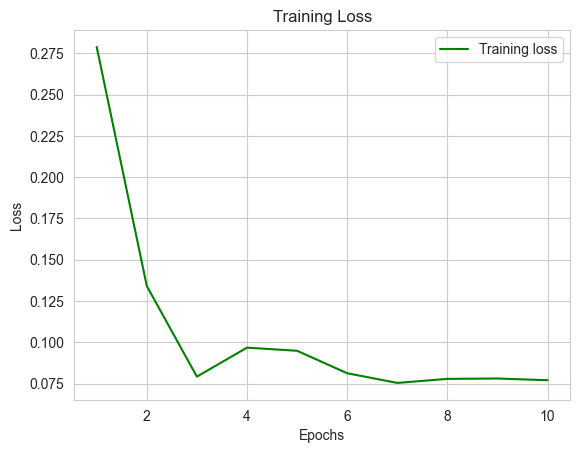

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
epochs = range(1, len(train_loss) + 1)


plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()